In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pickle



#USE DIFFERENT DATA TO TRAIN SPECIFIC MODELS

In [2]:
btc = pd.read_csv("datasets/coin_Bitcoin.csv" , low_memory=False)
btc.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [3]:
btc.isna()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2986,False,False,False,False,False,False,False,False,False,False
2987,False,False,False,False,False,False,False,False,False,False
2988,False,False,False,False,False,False,False,False,False,False
2989,False,False,False,False,False,False,False,False,False,False


In [4]:
btc.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


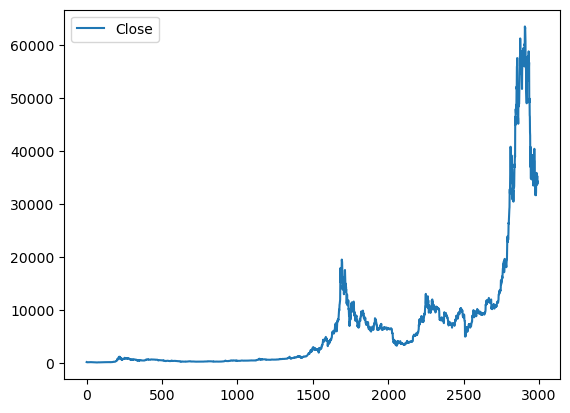

In [5]:
line_graph = btc.plot.line(y="Close", use_index=True)

In [6]:
target = btc["Close"]
features = btc[["Open", "High", "Low", "Volume","Close"]]
features.head()

,Open,High,Low,Volume,Close
0,134.444000,147.488007,134.000000,0.0,144.539993
1,144.000000,146.929993,134.050003,0.0,139.000000
2,139.000000,139.889999,107.720001,0.0,116.989998
3,116.379997,125.599998,92.281898,0.0,105.209999
4,106.250000,108.127998,79.099998,0.0,97.750000


In [7]:
target.head()

0    144.539993
1    139.000000
2    116.989998
3    105.209999
4     97.750000
Name: Close, dtype: float64

In [8]:
 # Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

btc_model = LinearRegression()

# Train the model on the training data
btc_model.fit(X_train, y_train)

LinearRegression()

In [9]:
# Make predictions on the testing data
predictions = btc_model.predict(X_test)

Text(0.5, 1.0, 'Trading Volume vs Price')

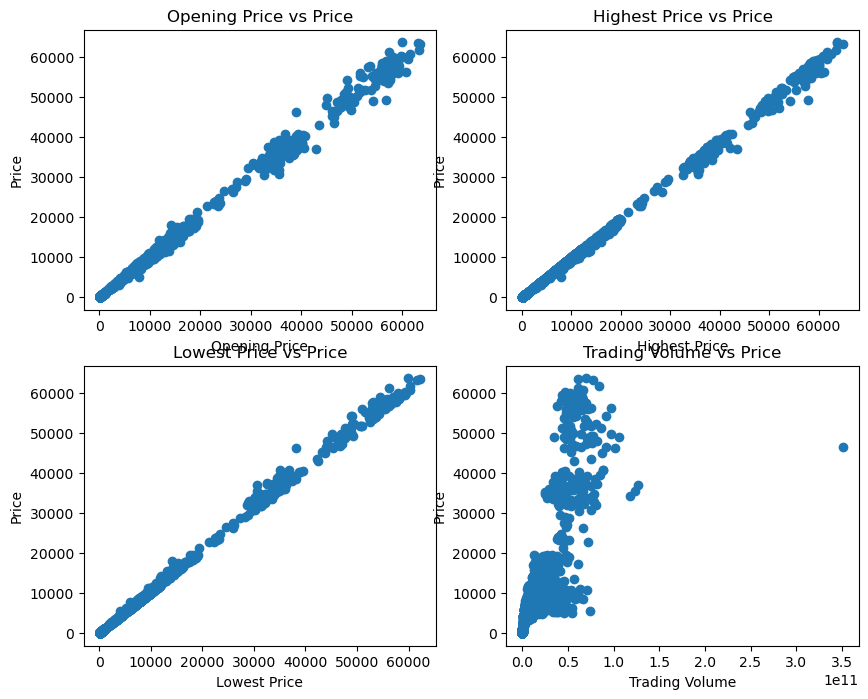

In [10]:
# Plot the data to visualize the trends
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].scatter(btc["Open"], target)
axs[0, 0].set_xlabel("Opening Price")
axs[0, 0].set_ylabel("Price")
axs[0, 0].set_title("Opening Price vs Price")

axs[0, 1].scatter(btc["High"], target)
axs[0, 1].set_xlabel("Highest Price")
axs[0, 1].set_ylabel("Price")
axs[0, 1].set_title("Highest Price vs Price")

axs[1, 0].scatter(btc["Low"], target)
axs[1, 0].set_xlabel("Lowest Price")
axs[1, 0].set_ylabel("Price")
axs[1, 0].set_title("Lowest Price vs Price")

axs[1, 1].scatter(btc["Volume"], target)
axs[1, 1].set_xlabel("Trading Volume")
axs[1, 1].set_ylabel("Price")
axs[1, 1].set_title("Trading Volume vs Price")

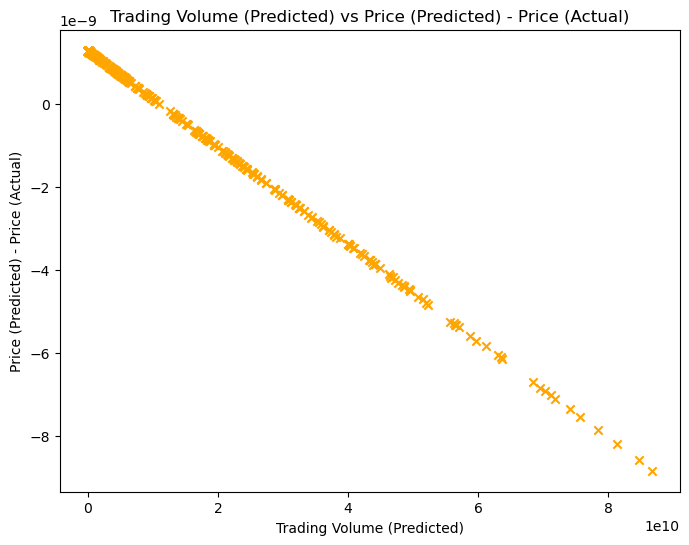

In [11]:
# difference in market volume vs predicted market volume
plt.figure(figsize=(8, 6))
plt.scatter(X_test["Volume"], predictions - y_test, color='orange', marker='x')
plt.xlabel("Trading Volume (Predicted)")
plt.ylabel("Price (Predicted) - Price (Actual)")
plt.title("Trading Volume (Predicted) vs Price (Predicted) - Price (Actual)")
plt.show()

In [12]:
#Export model
pickle.dump(btc_model, open("btc_model.pkl","wb"))